#### Clustering of the collected path points

In [22]:
# importing the libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# importing the dataset
dataset = pd.read_csv('/home/sr42/catkin_ws/src/vayubhoomi-uav-ugv/src/vision/src/wasteTensorflow/poi.csv')
X = pd.DataFrame(dataset)
X = X.to_numpy(dtype ='float32')
dataset

,x,y
0,0.000000,0.000000
1,0.298154,0.280744
2,0.298535,0.281480
3,0.299678,0.283679
4,0.300437,0.285139
...,...,...
17508,-0.095816,1.338956
17509,-0.096270,1.339320
17510,-0.096270,1.339320
17511,-0.096270,1.339320


In [24]:
# setting the thresholds for clustering
numClusters = 5
print('Number of clusters = ', numClusters)

Number of clusters =  5


In [25]:
# clustering
kmeans = KMeans(n_clusters = numClusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

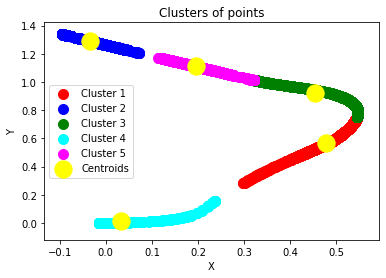

In [26]:
# visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [27]:
# saving centroids in a new CSV file
centroidDataframe = pd.DataFrame(kmeans.cluster_centers_)
centroidDataframe.columns = ['x', 'y']
centroidDataframe.to_csv('centroids.csv', index=False)

In [28]:
# centroids
dataset = pd.read_csv('centroids.csv')
dataset.head()

,x,y
0,0.478135,0.566019
1,-0.034132,1.289884
2,0.452937,0.919659
3,0.033298,0.011471
4,0.195748,1.109758
